In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pickle


import pandas as pd

from imblearn.over_sampling import RandomOverSampler

from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline





import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [2]:
df =pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Let us create Feature Matrix X and the Target y

In [4]:
target ="Bankrupt?"
X =df.drop(columns=target)
y=df[target]
print(X.shape)
print(y.shape)

(6819, 95)
(6819,)


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("y_train Shape:",y_train.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (5455, 95)
X_test Shape: (1364, 95)
y_train Shape: (5455,)
y_test Shape: (1364,)


In [6]:
over_sampler =RandomOverSampler(random_state=42)
X_train_over,y_train_over=over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


Building Model

In [7]:
base_accuracy=y_train_over.value_counts(normalize=True).max()
base_accuracy

0.5

Create a pipeline that contains Simple Imputer as well as GradientBoostingClassifier

In [8]:
classifier=make_pipeline(SimpleImputer(),GradientBoostingClassifier())

Create a dictionary with range of hyperparameters we want to evaluate for our classifier

In [9]:
params = {
    "simpleimputer__strategy":["mean","median"],
    "gradientboostingclassifier__n_estimators":range(20,31,5),
    "gradientboostingclassifier__max_depth":range(2,5)
    
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [10]:
model =GridSearchCV(classifier,param_grid=params,n_jobs=-1,verbose=1)

Fit our model to over_sampled data

In [11]:
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

Extract the cross_validation results from `model` and load them into a dataFrame named cv_results

In [12]:
results=pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,9.191183,0.901596,0.011488,0.004779,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.962648,0.965012,0.964522,0.966887,0.972091,0.966232,0.003225,1
16,9.415436,0.035108,0.010322,0.000674,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.963121,0.964066,0.964522,0.966887,0.972091,0.966137,0.003225,2
14,8.045854,0.186086,0.012377,0.003973,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.961702,0.962175,0.962157,0.964995,0.969726,0.964151,0.003022,3
15,8.078114,0.160497,0.009706,0.000088,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.961229,0.962648,0.962157,0.964995,0.968780,0.963962,0.002710,4
12,6.294179,0.046019,0.009816,0.000551,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.957447,0.960284,0.957900,0.961211,0.967360,0.960840,0.003553,5
13,6.455057,0.101020,0.009833,0.000906,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.957447,0.958392,0.957900,0.961211,0.967360,0.960462,0.003690,6
10,7.285957,0.101961,0.009856,0.000078,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.945154,0.948936,0.950804,0.947020,0.945601,0.947503,0.002113,7
11,7.625999,0.151023,0.010283,0.000480,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.945154,0.948936,0.950804,0.946547,0.945601,0.947408,0.002143,8
9,6.148048,0.028279,0.009570,0.000148,3,25,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.939007,0.942317,0.932829,0.942763,0.942763,0.939936,0.003822,9
8,6.015197,0.024203,0.009579,0.000214,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.939007,0.942317,0.932829,0.942289,0.942763,0.939841,0.003756,10


Extract best hyperparameter models

In [13]:
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'median'}

Evaluate Your Model

In [14]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 3))
print("Validation Accuracy:", round(acc_test, 3))

Training Accuracy: 0.949
Validation Accuracy: 0.927


Let us create a confusion Matrix to see how our `Model` performed

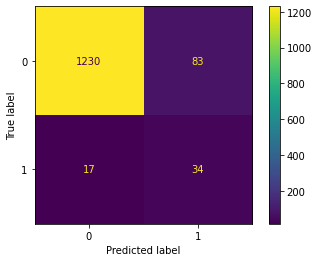

In [15]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);


Print Classification report

In [16]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5286
           1       0.38      0.99      0.55       169

    accuracy                           0.95      5455
   macro avg       0.69      0.97      0.76      5455
weighted avg       0.98      0.95      0.96      5455



In [17]:
model.predict(X_test)[:6]

array([0, 0, 0, 1, 0, 0])

In [18]:
model.predict_proba(X_test)[:5,-1]

array([0.04211313, 0.03756504, 0.03756504, 0.8594525 , 0.37552619])